In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Ensemble MaBoSS simulations

In [2]:
import maboss
import time

In [3]:
outputs = ['Apoptosis', 'CellCycleArrest', 'Invasion']

## Simulating the ensemble, keeping individual results to be analyzed

In [4]:
simulation = maboss.Ensemble(
    path="Invasion",
    individual_results=True
)

In [5]:
simulation.param.update({
    'sample_count': 50000, 
    'thread_count': 6,
    'max_time': 50,
    'time_tick': 1
})
simulation.set_outputs(outputs)
simulation.set_istate("DNAdamage", (0.5, 0.5))
simulation.set_istate("ECMicroenv", (0.5, 0.5))

In [6]:
t0 = time.time()
result = simulation.run()
print("Simulation executed in %.2fs" % (time.time() - t0))

Simulation executed in 12.02s


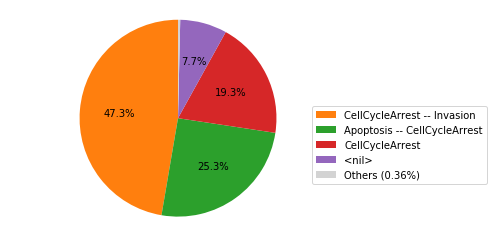

In [7]:
result.plot_piechart()

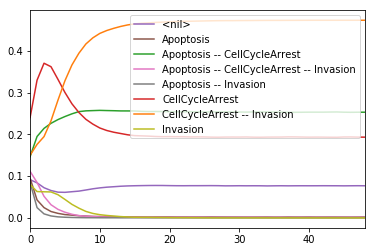

In [8]:
result.plot_trajectory()

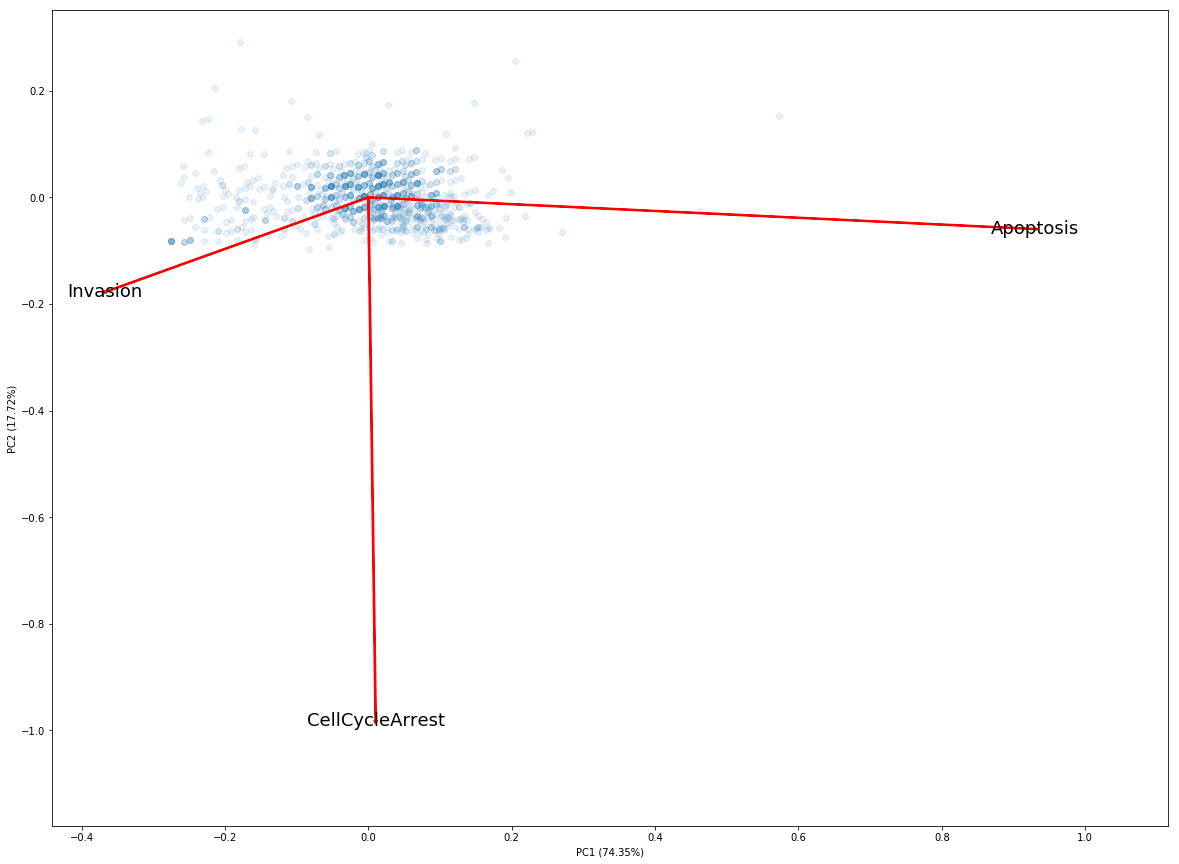

In [9]:
result.plotSteadyStatesNodesDistribution(figsize=(20, 15))

## Simulating the p53--, NICD++ mutant

In [10]:
simulation_mutant = simulation.copy()
simulation_mutant.mutate('p53', 'OFF')
simulation_mutant.mutate('NICD', 'ON')

In [11]:
t0 = time.time()
result_mutant = simulation_mutant.run()
print("Simulation executed in %.2fs" % (time.time() - t0))

Simulation executed in 13.58s


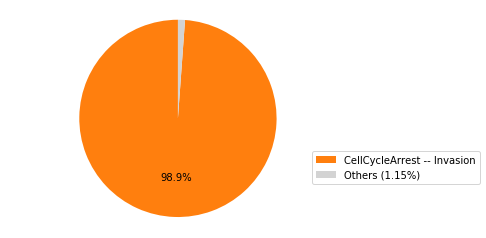

In [12]:
result_mutant.plot_piechart()

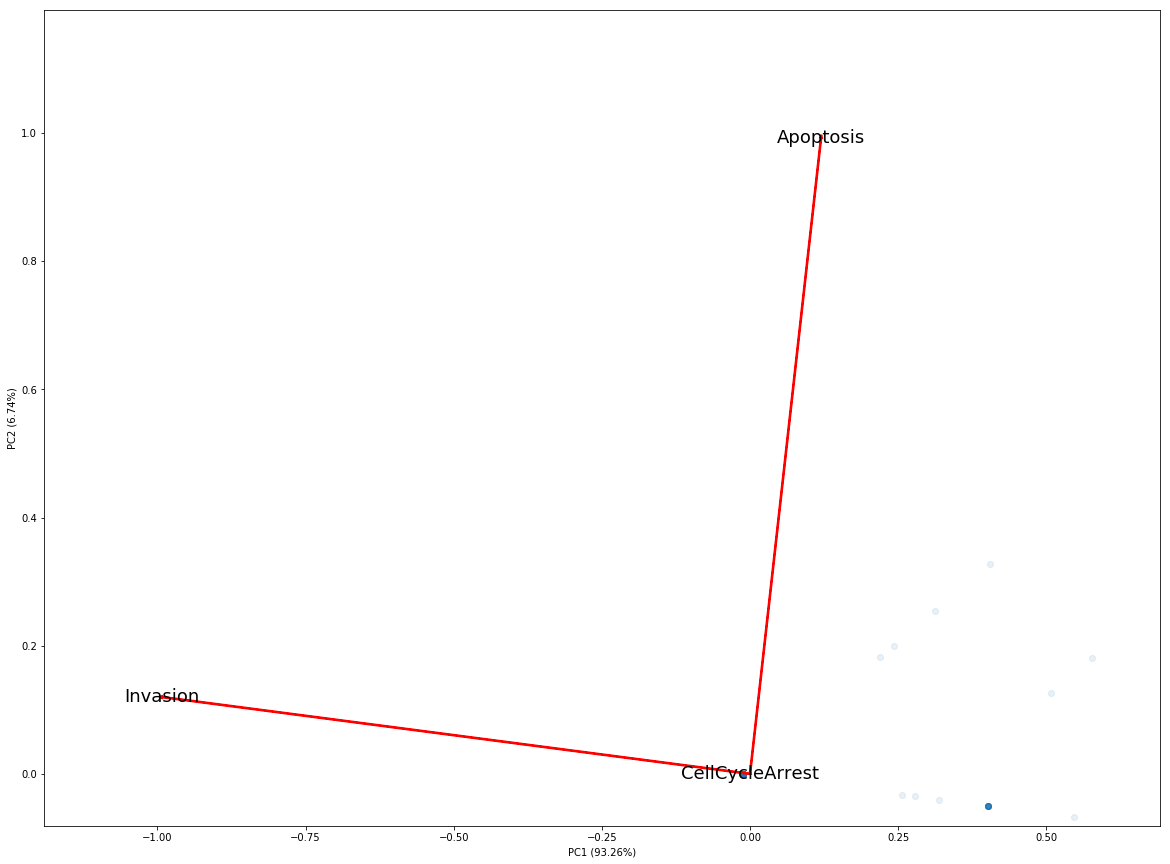

In [13]:
result_mutant.plotSteadyStatesNodesDistribution(figsize=(20, 15))

## Comparing the results

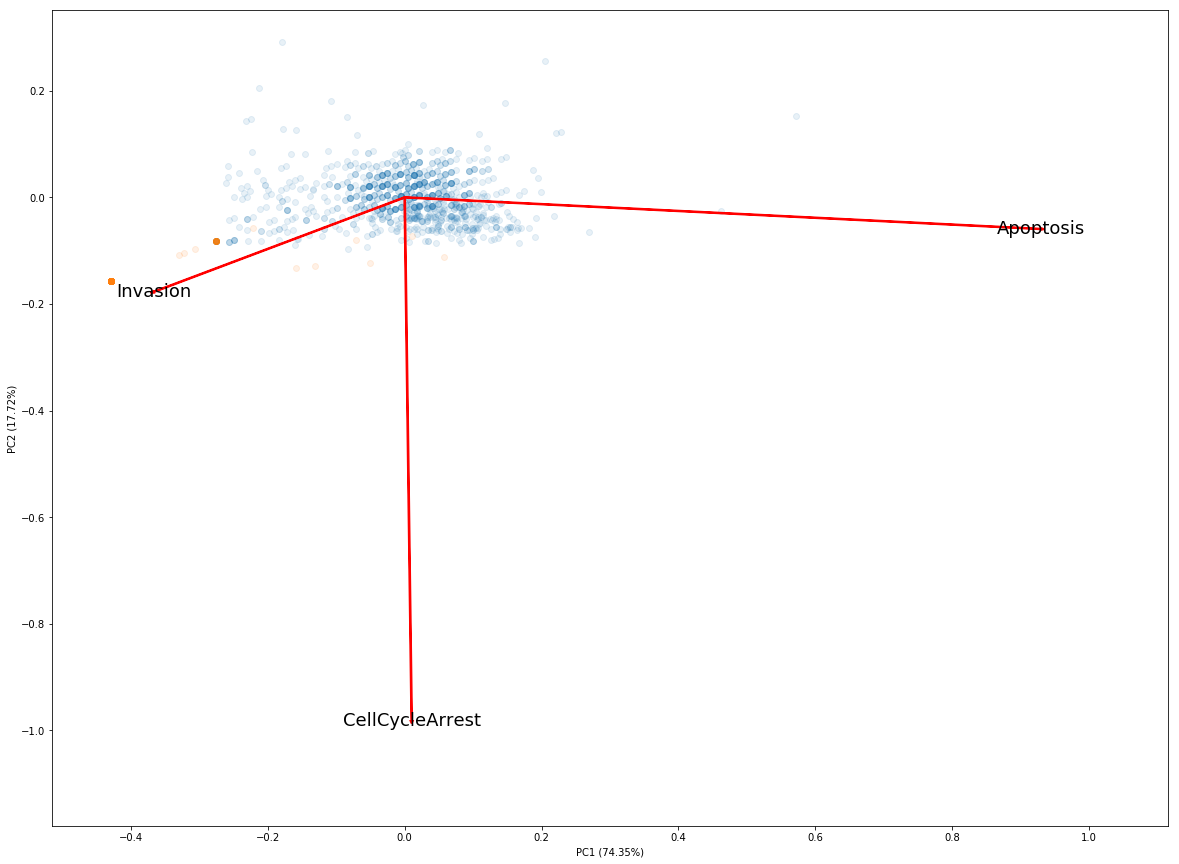

In [14]:
result.plotSteadyStatesNodesDistribution(figsize=(20, 15), compare=result_mutant)

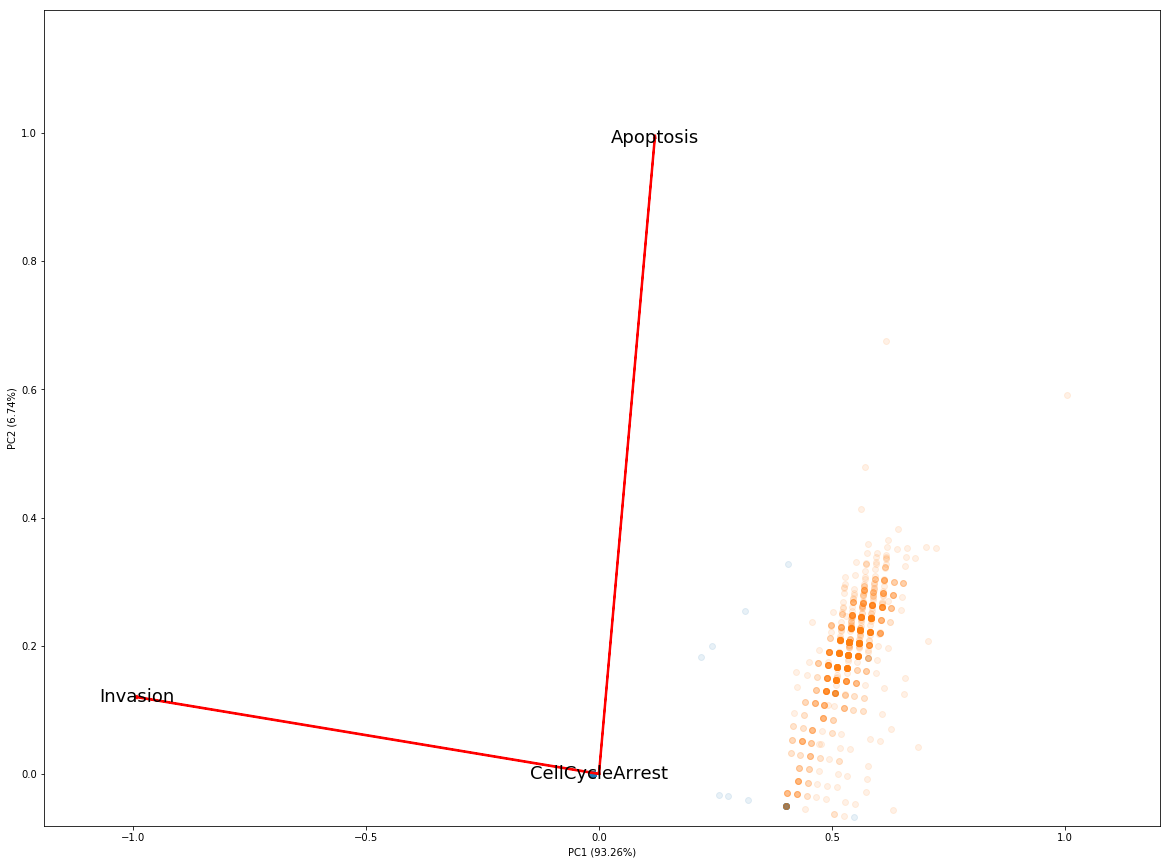

In [15]:
result_mutant.plotSteadyStatesNodesDistribution(figsize=(20, 15), compare=result)